In [ ]:
# Paso 1: Generamos el componente de error o "ruido".
# rnorm(20) crea 20 números aleatorios de una distribución normal (media 0, desv. estándar 1).
# Al multiplicar por 3, aumentamos su dispersión (ahora la desv. estándar es 3).
eps <- rnorm(20) * 3

# Creamos la variable independiente 'x' con una desviación estándar de 4.
x <- rnorm(20) * 4

# Creamos la variable independiente 'z' con una desviación estándar de 6.
z <- rnorm(20) * 6

# Ahora, establecemos relaciones lineales.
# 'y' depende positivamente de 'x' (y = 2x + 1) más el ruido.
y <- 2 * x + 1 + eps
# 'yp' depende negativamente de 'z' (yp = -2z + 3) más el mismo ruido.
yp <- -2 * z + 3 + eps

# --- Inspección de los datos ---
# Usamos data.frame() para unir nuestros vectores en una tabla.
# head() nos muestra las primeras 6 filas de esa tabla.
# Esto es crucial para verificar que los datos se han generado como esperamos.
head(data.frame(x, y, z, yp))

,x,y,z,yp
,<dbl>,<dbl>,<dbl>,<dbl>
1,-4.21842808,-8.394880,-5.820490,13.6829574
2,2.16408018,1.614316,-11.181409,21.6489728
3,2.49332689,8.426829,2.377681,0.6848144
4,-0.08491329,1.883756,5.354970,-6.6563580
5,0.29552862,-4.514781,-7.652210,12.1985806
6,2.91662215,5.248486,6.832961,-12.2506809


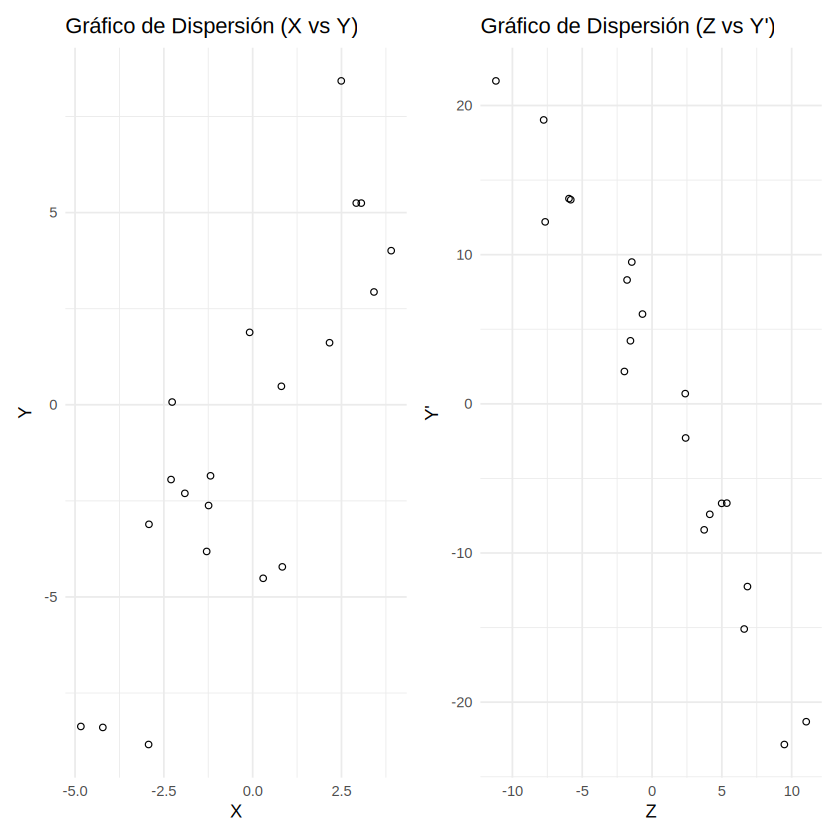

In [10]:
library(ggplot2)
library(patchwork)

# Es una buena práctica tener los datos en un data.frame
# Creamos uno para cada par de variables
df_xy <- data.frame(x_col = x, y_col = y)
df_zyp <- data.frame(z_col = z, yp_col = yp)

# Creamos el primer gráfico de dispersión (Y en función de X)
# Lo guardamos en la variable p1
p1 <- ggplot(data = df_xy, aes(x = x_col, y = y_col)) +
  geom_point(shape = 1) +  # Dibuja los puntos. shape = 1 es un círculo vacío, igual a pch = 1
  labs(x = "X", y = "Y", title = "Gráfico de Dispersión (X vs Y)") + # Añade etiquetas y título
  theme_minimal() # Un tema visual limpio

# Creamos el segundo gráfico de dispersión (Y' en función de Z)
# Lo guardamos en la variable p2
p2 <- ggplot(data = df_zyp, aes(x = z_col, y = yp_col)) +
  geom_point(shape = 1) +
  labs(x = "Z", y = "Y'", title = "Gráfico de Dispersión (Z vs Y')") +
  theme_minimal()

# Muestra el gráfico p1 a la izquierda y p2 a la derecha
p1 + p2

In [7]:
# --- Correlación de Pearson (por defecto) ---
# Mide la fuerza de una relación LINEAL. El coeficiente va de -1 a 1.
# Esperamos una correlación fuerte y negativa para (z, yp).
cor.test(z, yp)
# Esperamos una correlación fuerte y positiva para (x, y).
cor.test(x, y)

# --- Correlación de Spearman ---
# Es una prueba no paramétrica basada en rangos.
# Mide si la relación es monotónica (siempre creciente o decreciente), pero no necesariamente lineal.
# Es útil si sospechamos de valores atípicos o una relación no lineal.
cor.test(z, yp, method = "spearman")
cor.test(x, y, method = "spearman")

# --- Correlación de Kendall ---
# Otra prueba no paramétrica basada en rangos.
# Mide la concordancia en la dirección de los pares de puntos. Es robusta y a menudo usada
# con datos más pequeños o con muchos empates.
cor.test(z, yp, method = "kendall")
cor.test(x, y, method = "kendall")


	Pearson's product-moment correlation

data:  z and yp
t = -18.281, df = 18, p-value = 4.518e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9899147 -0.9343586
sample estimates:
       cor 
-0.9741108 



	Pearson's product-moment correlation

data:  x and y
t = 6.4797, df = 18, p-value = 4.283e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6257757 0.9335286
sample estimates:
      cor 
0.8366206 



	Spearman's rank correlation rho

data:  z and yp
S = 2600, p-value = 6.321e-06
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.9548872 



	Spearman's rank correlation rho

data:  x and y
S = 288, p-value = 6.305e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7834586 



	Kendall's rank correlation tau

data:  z and yp
T = 17, p-value = 4.608e-09
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.8210526 



	Kendall's rank correlation tau

data:  x and y
T = 149, p-value = 0.0002659
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.5684211 
